# Введение в вероятностный подход в машинном обучении

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from setup import *
from scipy import stats
import ipywidgets as widgets
from IPython.display import display, HTML, Markdown

# Настройка стилей
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

## Повторение


**Машинное обучение** - это раздел из области прикладной математики.

## Математическая постановка задачи обучения

$X$ — пространство объектов  
$Y$ — множество ответов (предсказаний / оценок / прогнозов)  
$y(x)$, $y: X \to Y$ — неизвестная зависимость (target function)  

### Дано:  
$X^\ell = \{x_1, \ldots, x_\ell\} \subset X$ — обучающая выборка (training sample)  
$a(x, w)$, $a: X \times W \to Y$ — параметрическая модель зависимости  

### Найти:  
$w \in W$ — вектор параметров модели такой, что $a(x, w) \approx y(x)$  

### Критерий — минимум эмпирического риска:  
$$
\sum_{i=1}^\ell \mathcal{L}(w, x_i) \to \min_W \quad \text{(empirical risk minimization, ERM)}
$$
где $\mathcal{L}(w, x)$ — функция потерь (loss function) — тем больше, чем сильнее $a(x, w)$ отклоняется от правильного ответа $y(x)$

Вот пример, если loss function = МНК:
$$
\mathcal{L_i}(w, x_i, y_i) = (y_i - a(x_i, w))^2
$$

А сам функционал ошибки записывают так:

$$
Q(a, X, Y) = \frac{1}{n}\sum_{i=1}^{n}\mathcal{L_i}(w, x_i, y_i)=\frac{1}{n}\sum_{i=1}^{n}(y_i - a(x_i, w))^2 \rightarrow \min_{w}
$$


![alt text](..\data\linear_regression_animated.gif)

# Модель
Модель (predictive model) — параметрическое семейство функций

$$
A = \{a(x, w) \mid w \in W\},
$$

где $a: X \times W \to Y$ — фиксированная функция,  
$W$ — множество допустимых значений параметра $w$

**Пример.**  
Линейная модель с вектором параметров $w = (w_1, \ldots, w_n) \in \mathbb{R}^n$:

$$
a(x, w) = \sum_{j=1}^n w_j f_j(x)
$$

— для регрессии и ранжирования, $Y = \mathbb{R}$

# Основные задачи ML

На протяжении почти всего курса мы будем рассматривать машинное обучение с учителем (**supervised learning**).

Это то же самое, что и:
 - обучение по прецедентам
 - восстановление зависимостей по эмпирическим данным
 - предсказательное моделирование
 - аппроксимация функций по заданными точкам

 В основе, есть две задачи МО
* **Классификация** (${Y}$ - конечное)
* **Регрессия** (${Y}$ - бесконечное)

![alt text](..\data\sklearn-2-7461609.png)

# Train и Test. Алгоритм обучения

**Этап обучения (train):**  
алгоритм обучения (learning algorithm) $\mu: (X \times Y)^\ell \to W$  
по выборке $X^\ell = (x_i, y_i)_{i=1}^\ell$ строит функцию $a(x, w)$,  
оценивая (оптимизируя) параметры модели $w \in W$ (чаще всего $w \in \mathbb{R}$ или $w \in \mathbb{R^n}$):  

$$
\begin{pmatrix}
f_1(x_1) & \cdots & f_n(x_1) \\
\vdots & \ddots & \vdots \\
f_1(x_\ell) & \cdots & f_n(x_\ell)
\end{pmatrix}
\begin{array}{c}
y_1 \\
\vdots \\
y_\ell
\end{array}
\to
\mu
$$

**Этап применения (test):**  
функция $a(x, w)$ для новых объектов $x'_i$ выдаёт ответы $a(x'_i, w)$:  

$$
\begin{pmatrix}
f_1(x'_1) & \cdots & f_n(x'_1) \\
\vdots & \ddots & \vdots \\
f_1(x'_k) & \cdots & f_n(x'_k)
\end{pmatrix}
\to
\begin{pmatrix}
a(x'_1, w) \\
\vdots \\
a(x'_k, w)
\end{pmatrix}
$$

### Вопрос:
**Почему мы не можем делать точные выводы из данных?**

<div style='background-color: #ffeb3b; padding: 15px; border-left: 5px solid #ffc107; margin: 10px 0'>
<b>💡 Ключевая идея:</b> Процессы, порождающие данные, слишком сложны. 
Наши модели неизбежно содержат <b>неопределенность</b>. 
Теория вероятностей — это математический язык для работы с неопределенностью.
</div>

## Основы теории вероятностей (быстрое повторение)

### 2.1 Дискретные vs непрерывные случайные величины

**Дискретная СВ** (например, бросок кубика):
- Конечное или счетное число исходов
- Каждому исходу присвоена вероятность
- Сумма вероятностей = 1

![alt text](..\data\Dice_Distribution_(bar).svg.png)

**Непрерывная СВ** (например, рост человека):
- Исходы — вещественная прямая ℝ
- Используем **плотность распределения** p(x)
- Интеграл плотности = 1

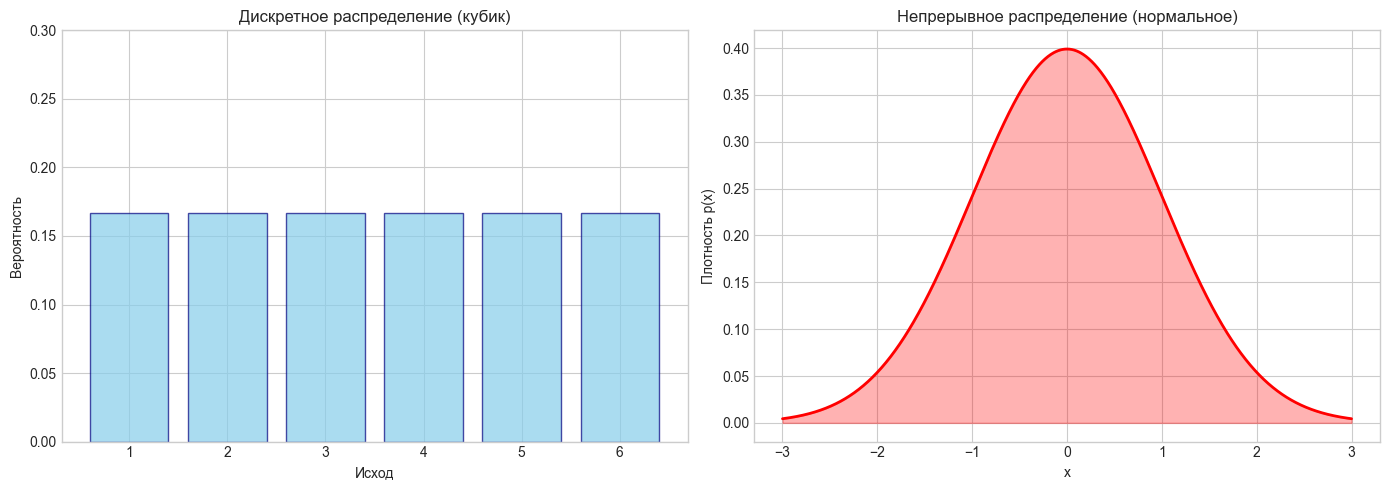

In [3]:
# Визуализация: дискретное vs непрерывное распределение
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Дискретное: бросок кубика
dice_outcomes = [1, 2, 3, 4, 5, 6]
dice_probs = [1/6] * 6
axes[0].bar(dice_outcomes, dice_probs, alpha=0.7, color='skyblue', edgecolor='navy')
axes[0].set_xlabel('Исход')
axes[0].set_ylabel('Вероятность')
axes[0].set_title('Дискретное распределение (кубик)')
axes[0].set_ylim(0, 0.3)

# Непрерывное: нормальное распределение
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)
axes[1].fill_between(x, y, alpha=0.3, color='red')
axes[1].plot(x, y, 'r-', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('Плотность p(x)')
axes[1].set_title('Непрерывное распределение (нормальное)')

plt.tight_layout()
plt.show()

### 2.2 Совместная вероятность и независимость

**Совместная вероятность** p(x, y) — вероятность одновременного наступления двух событий

**Независимость**: x и y независимы, если

$$p(x, y) = p(x) \cdot p(y)$$

In [ ]:
# Интерактивная визуализация совместного распределения
def plot_joint_distribution(independence=True):
    fig, ax = plt.subplots(figsize=(8, 6))

    if independence:
        # Независимые величины
        x = np.random.normal(0, 1, 500)
        y = np.random.normal(0, 1, 500)
        title = 'Независимые величины\np(x,y) = p(x)·p(y)'
    else:
        # Зависимые величины
        x = np.random.normal(0, 1, 500)
        y = x * 0.7 + np.random.normal(0, 0.5, 500)
        title = 'Зависимые величины\np(x,y) ≠ p(x)·p(y)'

    ax.scatter(x, y, alpha=0.5, s=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    plt.show()

print("Нажмите кнопки для визуализации:")
widgets.interact(plot_joint_distribution,
                 independence=widgets.Checkbox(value=True, description='Независимые'));

Нажмите кнопки для визуализации:


interactive(children=(Checkbox(value=True, description='Независимые'), Output()), _dom_classes=('widget-intera…

### 2.3 Маргинализация

Чтобы получить вероятность одной величины из совместной, нужно **просуммировать** (или проинтегрировать) по другой:

$$p(x) = \sum_y p(x, y) \quad \text{(дискретный случай)}$$

$$p(x) = \int p(x, y) dy \quad \text{(непрерывный случай)}$$

<div style='background-color: #e3f2fd; padding: 15px; border-left: 5px solid #2196f3; margin: 10px 0'>
<b>📌 Аналогия:</b> Маргинализация — это как "спроецировать" 3D поверхность на ось, 
получив распределение одной переменной.
</div>

## Часть 3: Условная вероятность и парадокс Монти Холла

### 3.1 Условная вероятность

**Условная вероятность** $p(x | y)$ — вероятность x, если известно, что произошло y:

$$p(x | y) = \frac{p(x, y)}{p(y)}$$

### 3.2 Парадокс Монти Холла — интерактивный разбор

<div style='background-color: #fff3e0; padding: 15px; border-left: 5px solid #ff9800; margin: 10px 0'>
<b>🎮 Задача:</b> 
Три шкатулки, в одной приз. Вы выбираете одну. Ведущий открывает одну из оставшихся (пустую).
Стоит ли поменять выбор?
</div>

![alttext](../data/mh0.png)

![alttext](../data/mh1.png)

In [ ]:
# Интерактивная симуляция

@widgets.interact(n_trials=widgets.IntSlider(min=2, max=1000, step=1, value=1000))
def run_monty_hall(n_trials=1000):
    stay_prob, switch_prob = monty_hall_simulation(n_trials)

    fig, ax = plt.subplots(figsize=(10, 6))
    strategies = ['Не менять', 'Менять']
    probs = [stay_prob, switch_prob]
    colors = ['#ff6b6b', '#4ecdc4']

    bars = ax.bar(strategies, probs, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Вероятность выигрыша')
    ax.set_title(f'Парадокс Монти Холла (симуляция {n_trials} игр)')

    # Добавляем теоретические значения
    ax.axhline(y=1/3, color='red', linestyle='--', alpha=0.5, label='Теория: 1/3')
    ax.axhline(y=2/3, color='blue', linestyle='--', alpha=0.5, label='Теория: 2/3')

    # Добавляем значения на столбцы
    for bar, prob in zip(bars, probs):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{prob:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax.legend()
    plt.tight_layout()
    plt.show()

    print(f"\n💡 Вывод: Меняя выбор, вы выигрываете в {switch_prob/stay_prob:.1f} раза чаще!")

interactive(children=(IntSlider(value=1000, description='n_trials', max=1000, min=2), Output()), _dom_classes=…

![alttext](../data/mh2.webp)

![alttext](../data/mh3.webp)

### 3.3 Почему так происходит? (разбор по Байесу)

Пусть:
- $x_1$ = приз в выбранной шкатулке
- $y$ = какую шкатулку открыл ведущий

**До того, как ведущий открыл шкатулку:**
- $p(x_1 = 1) = 1/3$

**После того, как ведущий открыл одну из оставшихся:**
- $p(x_1 = 1 | y) = 1/3$ (не изменилось!)
- $p(x_1 = 0 | y) = 2/3$

**Интуиция:** Вы фактически выбираете между одной шкатулкой и двумя оставшимися 
(из которых ведущий уже убрал одну пустую).

## Часть 4: Теорема Байеса

### 4.1 Вывод формулы

Из определения условной вероятности:

$$p(x, y) = p(x | y)p(y) = p(y | x)p(x)$$

Отсюда:

$$\Large p(y | x) = \frac{p(x | y)p(y)}{p(x)} = \frac{p(x | y)p(y)}{\sum_{y'} p(x | y')p(y')}$$

**Это самая важная формула машинного обучения!**

### 4.2 Медицинский пример: тест на болезнь

<div style='background-color: #fce4ec; padding: 15px; border-left: 5px solid #e91e63; margin: 10px 0'>
<b>🏥 Задача:</b> 
Тест на болезнь имеет точность 95% (5% ошибок в обе стороны).
Болезнью болеет 1% населения.
Человек получил положительный тест. Какова вероятность, что он действительно болен?
</div>

In [6]:
def bayes_medical_example(prevalence=0.01, test_accuracy=0.95):
    """
    Пример с медицинским тестом
    """
    # Обозначения:
    # d = disease (болезнь)
    # t = test (тест)

    p_d = prevalence  # P(болен) = 1%
    p_not_d = 1 - p_d

    p_t_given_d = test_accuracy  # P(+|болен) = 95%
    p_t_given_not_d = 1 - test_accuracy  # P(+|здоров) = 5%

    # P(+) = P(+|болен)·P(болен) + P(+|здоров)·P(здоров)
    p_t = p_t_given_d * p_d + p_t_given_not_d * p_not_d

    # P(болен|+) = P(+|болен)·P(болен) / P(+)
    p_d_given_t = (p_t_given_d * p_d) / p_t

    return p_d_given_t, p_t

In [ ]:
# Интерактивный пример
@widgets.interact(prevalence=widgets.FloatSlider(min=0.001, max=0.1, step=0.001, value=0.01,
                                                   description='Распр. болезни'),
                  accuracy=widgets.FloatSlider(min=0.7, max=0.99, step=0.01, value=0.95,
                                              description='Тест'))
def interactive_medical_example(prevalence=0.01, accuracy=0.95):
    prob_ill, prob_positive = bayes_medical_example(prevalence, accuracy)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # График 1: дерево вероятностей
    axes[0].axis('off')
    tree_text = f"""
    Дерево вероятностей:

    P(болен) = {prevalence:.1%}
    ├── P(+|болен) = {accuracy:.0%}
    │   └── P(болен и +) = {accuracy*prevalence:.3f}
    │
    P(здоров) = {1-prevalence:.1%}
    └── P(+|здоров) = {1-accuracy:.0%}
        └── P(здоров и +) = {(1-accuracy)*(1-prevalence):.3f}

    P(+) = {prob_positive:.3f}

    P(болен|+) = {prob_ill:.1%}
    """
    axes[0].text(0.1, 0.5, tree_text, fontsize=11, verticalalignment='center',
                 family='monospace', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

    # График 2: зависимость
    prevalences = np.linspace(0.001, 0.1, 100)
    probs = [bayes_medical_example(p, accuracy)[0] for p in prevalences]

    axes[1].plot(prevalences, probs, 'b-', linewidth=2)
    axes[1].axvline(x=prevalence, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(y=prob_ill, color='red', linestyle='--', alpha=0.5)
    axes[1].scatter([prevalence], [prob_ill], color='red', s=100, zorder=5)
    axes[1].set_xlabel('Распространенность болезни P(болен)')
    axes[1].set_ylabel('P(болен | положительный тест)')
    axes[1].set_title('Как распространенность влияет на достоверность теста')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\n🎯 Ответ: P(болен | +) = {prob_ill:.1%}")
    print(f"\n💡 Интуиция: Из 1000 человек:")
    print(f"   - {int(prevalence*1000)} действительно больны, из них {int(accuracy*prevalence*1000)} получат +")
    print(f"   - {int((1-prevalence)*1000)} здоровы, из них {int((1-accuracy)*(1-prevalence)*1000)} получат ложный +")
    print(f"   - Итого {int(prob_positive*1000)} человек с +, но только {int(prob_ill*prob_positive*1000)} из них больны")

interactive(children=(FloatSlider(value=0.01, description='Распр. болезни', max=0.1, min=0.001, step=0.001), F…

### 4.3 Интерпретация терминов

В машинном обучении мы переписываем теорему Байеса как:

$$p(w | D) = \frac{p(w)p(D | w)}{p(D)}$$

где:
- $p(w)$ — `априорная вероятность` (prior): наши представления до наблюдения данных
- $p(D | w)$ — `правдоподобие` (likelihood): насколько данные соответствуют параметрам
- $p(w | D)$ — `апостериорная вероятность` (posterior): обновленные представления после наблюдения данных
- $p(D)$ — `вероятность данных` (evidence): нормировочная константа

<div style='background-color: #e8f5e9; padding: 15px; border-left: 5px solid #4caf50; margin: 10px 0'>
<b>🔄 Байесовский вывод:</b> 
Мы переоцениваем наши априорные представления p(w) на основе данных D, 
получая новое состояние знаний p(w | D).
</div>

### 4.4 Частота vs Байес

**Классический (частотный) подход:**
- Вероятность = предел частоты при бесконечном числе экспериментов
- Подходит для повторяющихся событий (бросок монеты)

**Байесовский подход:**
- Вероятность = степень доверия (degree of belief)
- Подходит для уникальных событий:
  - Сборная России выиграет ЧМ
  - Мы живем в симуляции
  - "Одиссею" написала женщина

## Часть 5: Связь с машинным обучением

### Вероятностная постановка задачи машинного обучения

### Постановка задачи 1
Имеется простая выборка $X^\ell = (x_i, y_i)_{i=1}^\ell$ из неизвестного распределения $p(x, y) = P_y p_y(x)$. Требуется построить **эмпирические оценки** априорных вероятностей $\hat{P_y}$ и функций правдоподобия $p_y(x)$ для каждого из классов $y \in Y$.

### Постановка задачи 2
По известным плотностям распределения $p_y(x)$ и априорным вероятностям $P_y$ всех классов $y \in Y$ построить алгоритм $a(x)$, минимизирующий вероятность ошибочной классификации.

### 5.1 MLE (Maximum Likelihood Estimation)

**Задача ML:** по данным $D$ подобрать параметры $w$ модели

`MLE: "Какие параметры наиболее правдоподобны при данных, которые мы видели?"`

**MLE:** ищем параметры, максимизирующие правдоподобие:

$$w = \arg\max_{w} p(D | w)$$

### 5.2 Пример: подбрасывание монетки

Подбросили монетку $h$ раз решкой и $t$ раз орлом. Какова вероятность решки $w$?

**Правдоподобие:**

$$p(h, t | w) = w^h (1-w)^t$$

In [8]:
def coin_flip_mle(h, t):
    """
    Пример с монеткой: MLE vs MAP
    """
    # MLE
    w_mle = h / (h + t) if (h + t) > 0 else 0.5

    return w_mle

In [9]:
# Интерактивная визуализация
@widgets.interact(h=widgets.IntSlider(min=0, max=20, value=1, description='Решки (h)'),
                  t=widgets.IntSlider(min=0, max=20, value=0, description='Орлы (t)'))
def coin_flip_example(h=1, t=0):
    theta = np.linspace(0, 1, 1000)
    likelihood = theta**h * (1-theta)**t

    # Нормализуем для визуализации
    likelihood = likelihood / likelihood.max()

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # График правдоподобия
    axes[0].plot(theta, likelihood, 'b-', linewidth=2)
    axes[0].fill_between(theta, likelihood, alpha=0.3)
    theta_mle = h / (h + t) if (h + t) > 0 else 0.5
    axes[0].axvline(x=theta_mle, color='red', linestyle='--', linewidth=2, label=f'MLE: w = {theta_mle:.2f}')
    axes[0].set_xlabel('w (вероятность решки)')
    axes[0].set_ylabel('Нормализованное правдоподобие')
    axes[0].set_title(f'Функция правдоподобия\n{h} решек, {t} орлов')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Проблема MLE
    if h > 0 and t == 0:
        axes[1].text(0.5, 0.5, 'Проблема!\n\nПри t=0, MLE дает w=1\n(монетка всегда решка)\n\nЭто неразумно!',
                    ha='center', va='center', fontsize=14,
                    bbox=dict(boxstyle="round", facecolor="#ffeb3b", alpha=0.8))
        axes[1].set_xlim(0, 1)
        axes[1].set_ylim(0, 1)
        axes[1].axis('off')
    else:
        axes[1].set_xlim(0, 1)
        axes[1].set_ylim(0, 1)
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=1, description='Решки (h)', max=20), IntSlider(value=0, description='Орл…

<div style='background-color: #ffebee; padding: 15px; border-left: 5px solid #f44336; margin: 10px 0'>
<b>⚠️ Проблема MLE:</b> 
Если подбросить монетку 1 раз и выпадет решка, MLE скажет w=1 (всегда решка)!
Это неразумно. Нам нужно <b>априорное знание</b>.
</div>

### 5.3 MAP (Maximum a Posteriori)

**MAP:** максимизируем апостериорную вероятность:

$$\theta_{MAP} = \arg\max_{\theta} p(\theta | D) = \arg\max_{\theta} p(D | \theta)p(\theta)$$

`Какие параметры наиболее вероятны с учетом и данных, и того, что мы знали до эксперимента?`

С априорным распределением (например, Beta(6,6) для монетки из кармана):

$$\text{Beta}(\theta; \alpha, \beta) = \frac{1}{B(\alpha,\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}$$

In [10]:
def map_with_beta_prior(h, t, alpha=6, beta=6):
    """
    MAP оценка с бета-априором
    """
    # Апостериорное распределение: Beta(α+h, β+t)
    # MAP для бета-распределения: (α+h-1) / (α+β+h+t-2)
    theta_map = (alpha + h - 1) / (alpha + beta + h + t - 2)
    theta_mle = h / (h + t) if (h + t) > 0 else 0.5

    return theta_map, theta_mle

In [ ]:
@widgets.interact(h=widgets.IntSlider(min=0, max=10, value=1, description='Решки (h)'),
                  t=widgets.IntSlider(min=0, max=10, value=0, description='Орлы (t)'),
                  alpha=widgets.IntSlider(min=1, max=20, value=6, description='α (априор решки)'),
                  beta_param=widgets.IntSlider(min=1, max=20, value=6, description='β (априор орлы)'))
def map_example(h=1, t=0, alpha=6, beta_param=6):
    theta_map, theta_mle = map_with_beta_prior(h, t, alpha, beta_param)

    theta = np.linspace(0.001, 0.999, 1000)

    # Априор
    prior = stats.beta.pdf(theta, alpha, beta_param)
    prior = prior / prior.max()

    # Правдоподобие
    likelihood = theta**h * (1-theta)**t
    likelihood = likelihood / (likelihood.max() if likelihood.max() > 0 else 1)

    # Апостериор
    posterior = stats.beta.pdf(theta, alpha+h, beta_param+t)
    posterior = posterior / posterior.max()

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    axes[0].plot(theta, prior, 'g-', linewidth=2, label='Prior')
    axes[0].fill_between(theta, prior, alpha=0.3, color='green')
    axes[0].set_title('Априорное распределение')
    axes[0].set_xlabel('θ')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    axes[1].plot(theta, likelihood, 'b-', linewidth=2, label='Likelihood')
    axes[1].fill_between(theta, likelihood, alpha=0.3, color='blue')
    axes[1].set_title('Правдоподобие')
    axes[1].set_xlabel('θ')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    axes[2].plot(theta, posterior, 'r-', linewidth=2, label='Posterior')
    axes[2].fill_between(theta, posterior, alpha=0.3, color='red')
    axes[2].axvline(x=theta_map, color='red', linestyle='--', linewidth=2, label=f'MAP: {theta_map:.2f}')
    axes[2].axvline(x=theta_mle, color='orange', linestyle=':', linewidth=2, label=f'MLE: {theta_mle:.2f}')
    axes[2].set_title('Апостериорное распределение')
    axes[2].set_xlabel('θ')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\n📊 Результаты:")
    print(f"   MLE: θ = {theta_mle:.3f}")
    print(f"   MAP: θ = {theta_map:.3f}")
    print(f"\n💡 Априор 'сглаживает' оценку, предотвращая экстремальные значения!")

interactive(children=(IntSlider(value=1, description='Решки (h)', max=10), IntSlider(value=0, description='Орл…

### 5.4 Связь с минимизацией функции потерь (ERM)

**Ключевое наблюдение:** Максимизация правдоподобия эквивалентна минимизации функции потерь!

Для независимых данных:

$$p(D | \theta) = \prod_{d \in D} p(d | \theta)$$

Логарифмируем (монотонное преобразование не меняет arg max):

$$\log p(D | \theta) = \sum_{d \in D} \log p(d | \theta)$$

**MLE** превращается в:

$$\theta_{ML} = \arg\max_{\theta} \sum_{d \in D} \log p(d | \theta) = \arg\min_{\theta} \left(-\sum_{d \in D} \log p(d | \theta)\right)$$

А это в точности **ERM** с функцией потерь $-\log p(d | \theta)$!

<div style='background-color: #e1f5fe; padding: 15px; border-left: 5px solid #03a9f4; margin: 10px 0'>
<b>🔗 Связь:</b> 
- MLE (вероятностный подход) ≡ Минимизация отрицательного логарифмического правдоподобия
- MAP ≡ MLE + регуляризация (априор p(θ) действует как регуляризатор!)
- ERM ≡ общий фреймворк, включающий MLE/MAP как частные случаи
</div>

Предполагаем распределение данных: $y \sim P(y|x, w)$

Записываем правдоподобие: $P(D|w) = \prod_{i=1}^n P(y_i|x_i, w)$

Берем отрицательный логарифм: $-\log P(D|w) = \sum_{i=1}^n -\log P(y_i|x_i, w)$

Получаем loss-функцию: $L(y, \hat{y}) = -\log P(y|x, w)$

## Часть 6: Наивный байесовский классификатор

### 6.1 Идея

**Задача:** классифицировать объект x в класс y

**По Байесу:**

$$p(y | x) = \frac{p(y)p(x | y)}{p(x)}$$

**Наивное предположение:** признаки x₁, x₂, ..., xₙ условно независимы при данном y:

$$p(x | y) = p(x_1, x_2, ..., x_n | y) = \prod_{i=1}^n p(x_i | y)$$

**Классификатор:**

$$y_{pred} = \arg\max_y p(y) \prod_{i=1}^n p(x_i | y)$$

### 6.2 Пример: классификация текстов

**Задача:** определить, спам это или не спам

**Признаки:** наличие слов ("выигрыш", "бесплатно", "срочно", ...)

**Обучение:**
1. Считаем p(спам) и p(не спам) из данных
2. Для каждого слова считаем p(слово | спам) и p(слово | не спам)

**Предсказание:** перемножаем вероятности слов

In [12]:
class NaiveBayesClassifier:
    """
    Простой наивный байесовский классификатор для текстов
    """
    def __init__(self):
        self.class_priors = {}
        self.word_probs = {}
        self.vocab = set()

    def fit(self, texts, labels):
        """Обучение на текстах и метках"""
        from collections import defaultdict, Counter
        import numpy as np

        n_samples = len(texts)
        classes = np.unique(labels)

        # Считаем априорные вероятности классов
        for cls in classes:
            self.class_priors[cls] = np.sum(labels == cls) / n_samples

        # Считаем вероятности слов
        self.word_probs = {cls: defaultdict(lambda: 1e-10) for cls in classes}

        for text, label in zip(texts, labels):
            words = text.lower().split()
            self.vocab.update(words)
            for word in words:
                self.word_probs[label][word] += 1

        # Нормализуем
        for cls in classes:
            total = sum(self.word_probs[cls].values())
            for word in self.word_probs[cls]:
                self.word_probs[cls][word] /= total

    def predict_proba(self, text):
        """Предсказание вероятностей классов"""
        import numpy as np

        words = text.lower().split()
        log_probs = {}

        for cls in self.class_priors:
            log_prob = np.log(self.class_priors[cls])
            for word in words:
                if word in self.vocab:
                    log_prob += np.log(self.word_probs[cls].get(word, 1e-10))
            log_probs[cls] = log_prob

        # Преобразуем лог-вероятности в вероятности
        max_log_prob = max(log_probs.values())
        probs = {cls: np.exp(log_prob - max_log_prob) for cls, log_prob in log_probs.items()}
        total = sum(probs.values())
        probs = {cls: prob / total for cls, prob in probs.items()}

        return probs

    def predict(self, text):
        """Предсказание класса"""
        probs = self.predict_proba(text)
        return max(probs, key=probs.get)

In [13]:
# Пример использования
print("📧 Пример классификации спама:\n")

# Обучающие данные
train_texts = np.array([
    "выигрыш миллион бесплатно срочно",
    "зарплата отчет встреча завтра",
    "бесплатно приз выиграй сейчас",
    "проект дедлайн команда работа",
    "срочно переведи деньги счет",
    "совещание понедельник план квартал"
])
train_labels = np.array(['спам', 'не спам', 'спам', 'не спам', 'спам', 'не спам'])

# Обучаем
clf = NaiveBayesClassifier()
clf.fit(train_texts, train_labels)

# Тестируем
test_emails = [
    "выигрыш бесплатно миллион",
    "встреча проект отчет",
    "срочно переведи деньги выигрыш"
]

for email in test_emails:
    probs = clf.predict_proba(email)
    pred = clf.predict(email)
    print(f"Текст: '{email}'")
    print(f"  P(спам) = {probs.get('спам', 0):.3f}")
    print(f"  P(не спам) = {probs.get('не спам', 0):.3f}")
    print(f"  Предсказание: {pred}")
    print()

📧 Пример классификации спама:

Текст: 'выигрыш бесплатно миллион'
  P(спам) = 1.000
  P(не спам) = 0.000
  Предсказание: спам

Текст: 'встреча проект отчет'
  P(спам) = 0.000
  P(не спам) = 1.000
  Предсказание: не спам

Текст: 'срочно переведи деньги выигрыш'
  P(спам) = 1.000
  P(не спам) = 0.000
  Предсказание: спам



### 6.3 Связь с современными LLM

<div style='background-color: #f3e5f5; padding: 15px; border-left: 5px solid #9c27b0; margin: 10px 0'>
<b>🤖 От наивного Байеса к GPT:</b>

Современные языковые модели (LLM) тоже имеют под собой вероятностную основу:

**Языковая модель (GPT):** p(следующее_слово | контекст)

Разница в сложности моделей и способах оценки вероятностей!
</div>


![alt text](../data/llm.gif)

## Заключение

### Ключевые выводы:

1. **Вероятности** — язык для работы с неопределенностью в ML
2. **Теорема Байеса** позволяет обновлять знания при получении новых данных
3. **MLE** ≡ максимизация правдоподобия ≡ минимизация функции потерь
4. **MAP** = MLE + априор (регуляризация)
5. **Наивный Байес** — простой, но мощный классификатор на основе вероятностей

## Источники:

1. Сергей Николенко "Глубокое обучение" — Глава 2
2. Christopher Bishop "Pattern Recognition and Machine Learning" — Chapter 1
3. К. В. Воронцов "Математические методы обучения по прецедентам (теория обучения машин)"

---

**Спасибо за внимание! Вопросы??????**